In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.base import clone
from sklearn.metrics import r2_score


# 3 digits floating points prints
pd.set_option('display.precision', 3)

rd_state = 42

# Load and Prepare the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('data/wine_train.csv')
data.drop(columns=['wine_ID'], inplace=True)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
0,7.2,0.16,0.26,7.1,0.054,41.0,224.0,0.997,3.38,0.55,10.1,0,5
1,7.3,0.22,0.31,2.3,0.018,45.0,80.0,0.989,3.06,0.34,12.9,0,7
2,8.9,0.13,0.49,1.0,0.028,6.0,24.0,0.993,2.91,0.32,9.9,0,5
3,6.0,0.17,0.29,9.7,0.044,33.0,98.0,0.995,3.12,0.36,9.2,0,6
4,7.5,0.19,0.34,2.6,0.037,33.0,125.0,0.992,3.10,0.49,11.1,0,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4547 non-null   float64
 1   volatile acidity      4547 non-null   float64
 2   citric acid           4547 non-null   float64
 3   residual sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free sulfur dioxide   4547 non-null   float64
 6   total sulfur dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   pH                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  wine_type             4547 non-null   int64  
 12  target                4547 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 461.9 KB


In [4]:
# Split the dataset into features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_state)

# # create different dataset for wine type
# X0_train, X1_train = X_train[X_train['wine_type'] == 0].drop(columns=['wine_type']), X_train[X_train['wine_type'] == 1].drop(columns=['wine_type'])
# y0_train, y1_train = y_train[X_train['wine_type'] == 0], y_train[X_train['wine_type'] == 1]

# X0_test, X1_test = X_test[X_test['wine_type'] == 0].drop(columns=['wine_type']), X_test[X_test['wine_type'] == 1].drop(columns=['wine_type'])
# y0_test, y1_test = y_test[X_test['wine_type'] == 0], y_test[X_test['wine_type'] == 1]

# data0 = pd.concat([X0_train, y0_train], axis=1)
# data1 = pd.concat([X1_train, y1_train], axis=1)



In [5]:
# Standardize the features to have a mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# scaler0, scaler1 = StandardScaler(), StandardScaler()
# X0_train = scaler0.fit_transform(X0_train)
# X0_test = scaler0.transform(X0_test)

# X1_train = scaler1.fit_transform(X1_train)
# X1_test = scaler1.transform(X1_test)

# Exploratory Data Analysis

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
count,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000
mean,7.235,0.340,0.318,5.368,0.056,30.364,115.502,0.995,3.219,0.533,10.496,0.250,5.824
std,1.320,0.167,0.143,4.748,0.035,17.869,56.989,0.003,0.164,0.151,1.180,0.433,0.876
min,3.800,0.080,0.000,0.600,0.012,1.000,6.000,0.987,2.740,0.220,8.000,0.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,0.000,5.000
50%,7.000,0.290,0.310,2.900,0.047,29.000,118.000,0.995,3.210,0.510,10.300,0.000,6.000
75%,7.700,0.400,0.390,8.000,0.065,41.000,156.000,0.997,3.320,0.600,11.300,0.000,6.000
max,15.600,1.580,1.000,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.200,1.000,9.000


In [8]:
# data0.describe()

In [9]:
# data1.describe()

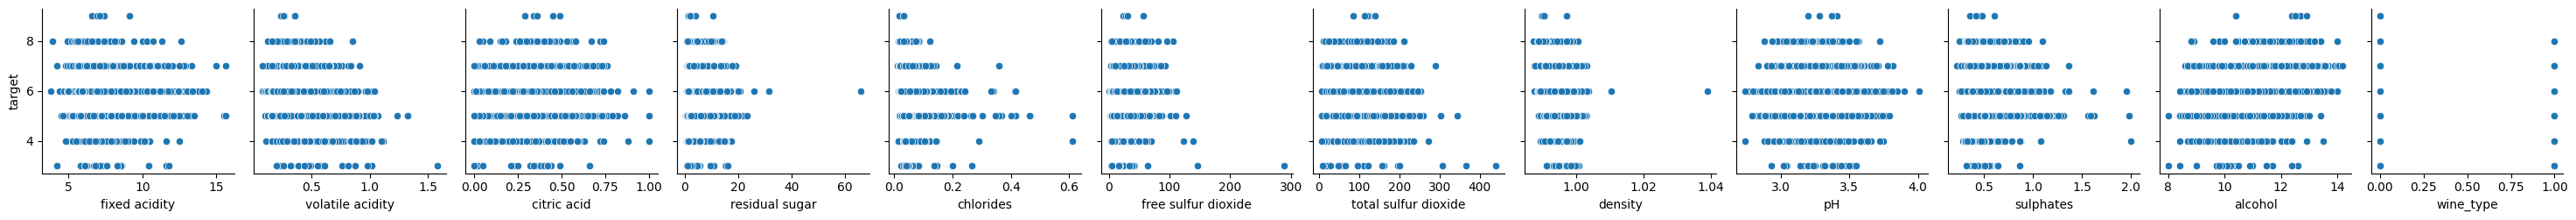

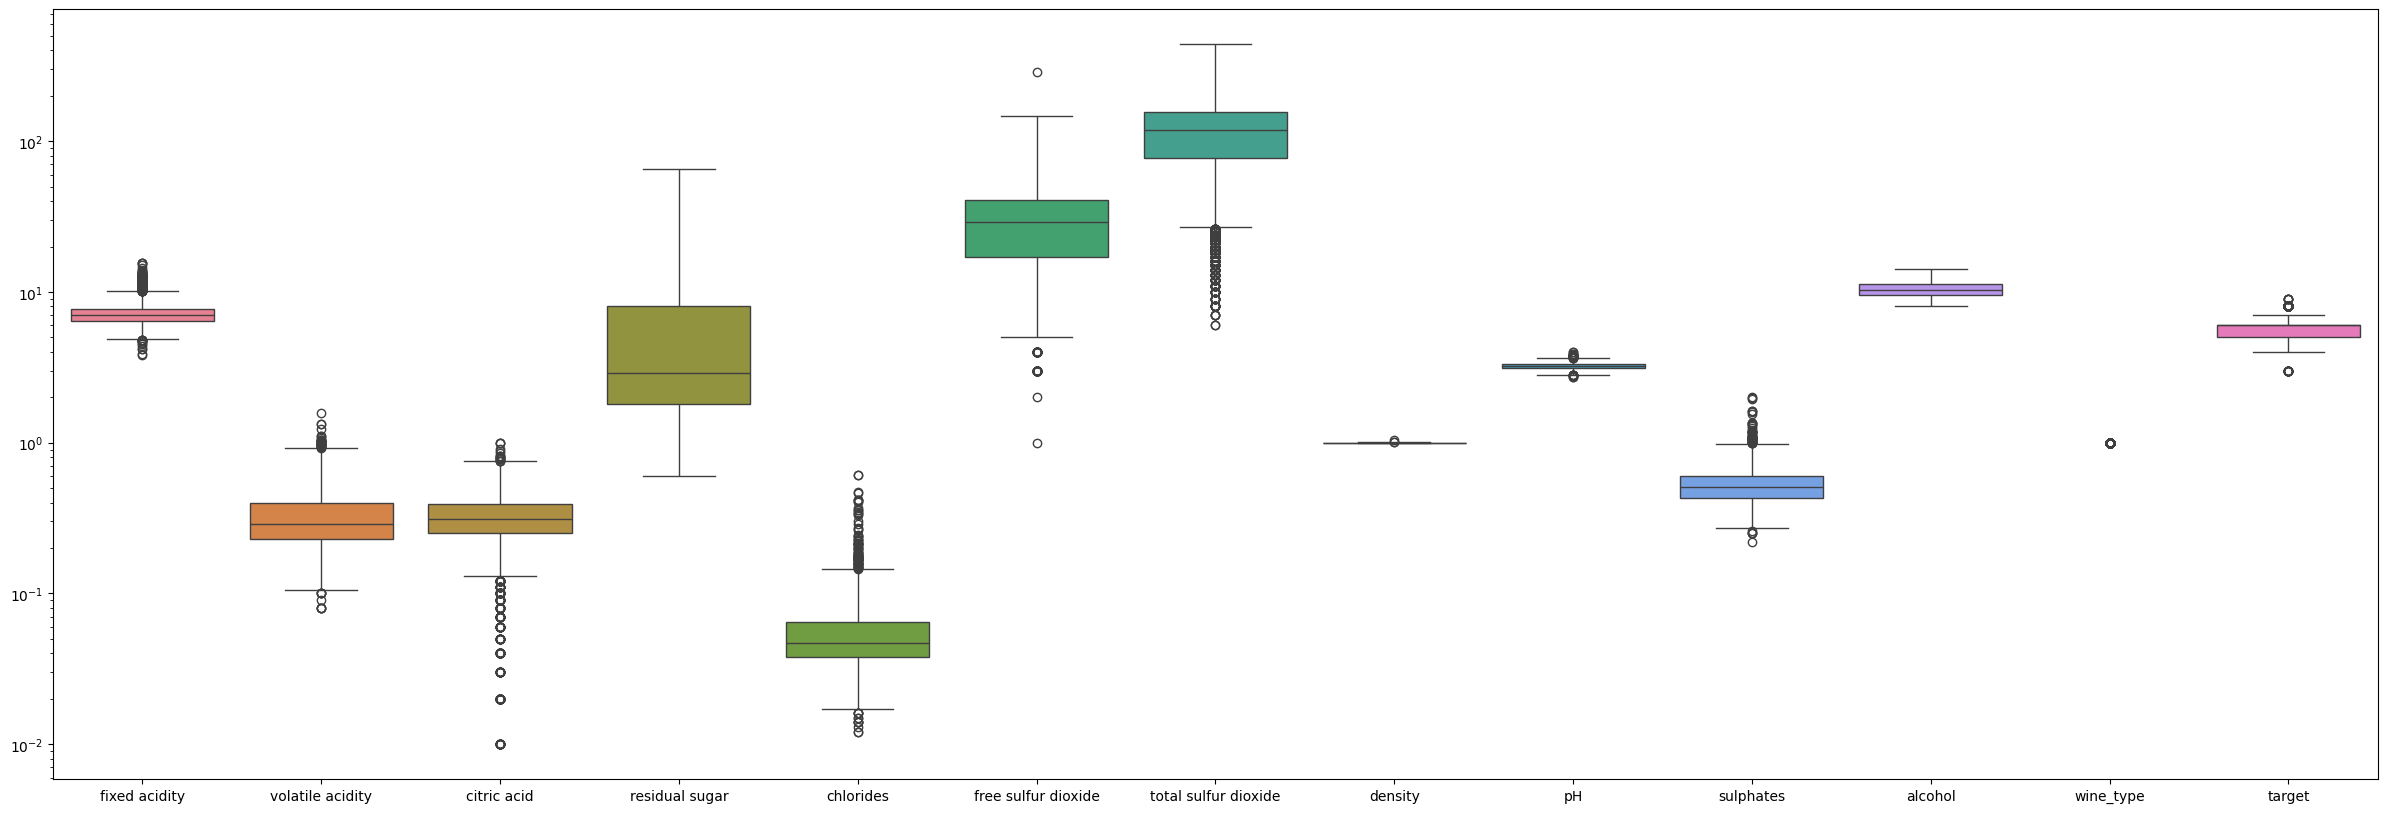

In [10]:
# Plot the scatter plot between target variable and other features
sns.pairplot(data, x_vars=data.columns[:-1], y_vars=['target'], kind='scatter')
plt.show()

# boxplot of all variables in log scale
plt.figure(figsize=(30, 10))
plt.yscale('log')
sns.boxplot(data=data)
plt.show()

In [11]:
# # Plot the scatter plot between target variable and other features
# sns.pairplot(data, x_vars=data.columns[:-2], y_vars=['target'], hue=data.columns[-2], kind='scatter')
# plt.show()

# # Melt the DataFrame into a long-form DataFrame
# melted_data = data.melt(id_vars='wine_type')

# # Create a boxplot with 'wine_type' as the hue
# plt.figure(figsize=(30, 10))
# plt.yscale('log')
# sns.boxplot(x='variable', y='value', hue='wine_type', data=melted_data)
# plt.title('Wine type comparison')
# plt.show()

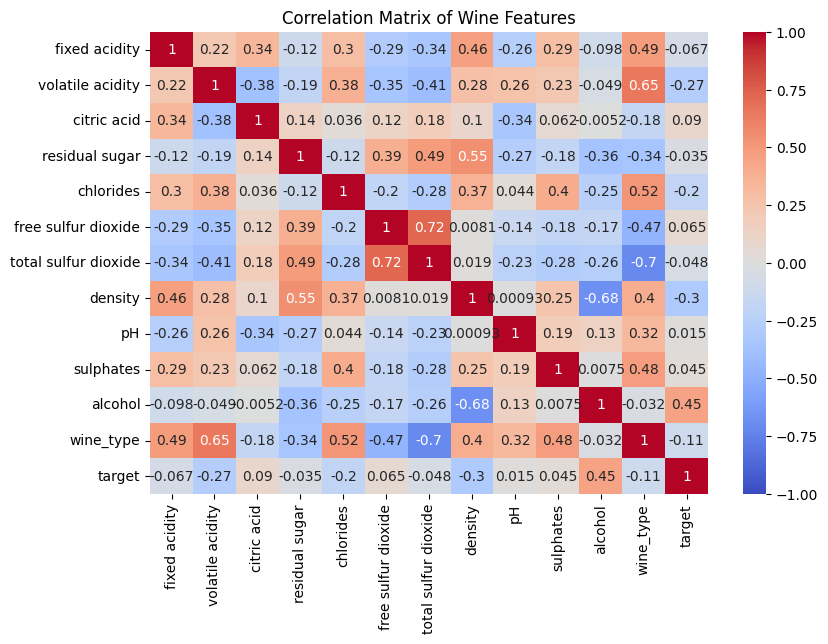

In [12]:
# Check the correlation between the features
plt.figure(figsize=(9, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [13]:
# # check the correlation between the features for each wine type
# fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(36, 8))

# sns.heatmap(data0.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax0)
# ax0.set_title('Correlation Matrix of Wine Features (type 0)')

# sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1)
# ax1.set_title('Correlation Matrix of Wine Features (type 1)')

# sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
# ax2.set_title('Correlation Matrix of Wine Features (all)')


# plt.show()


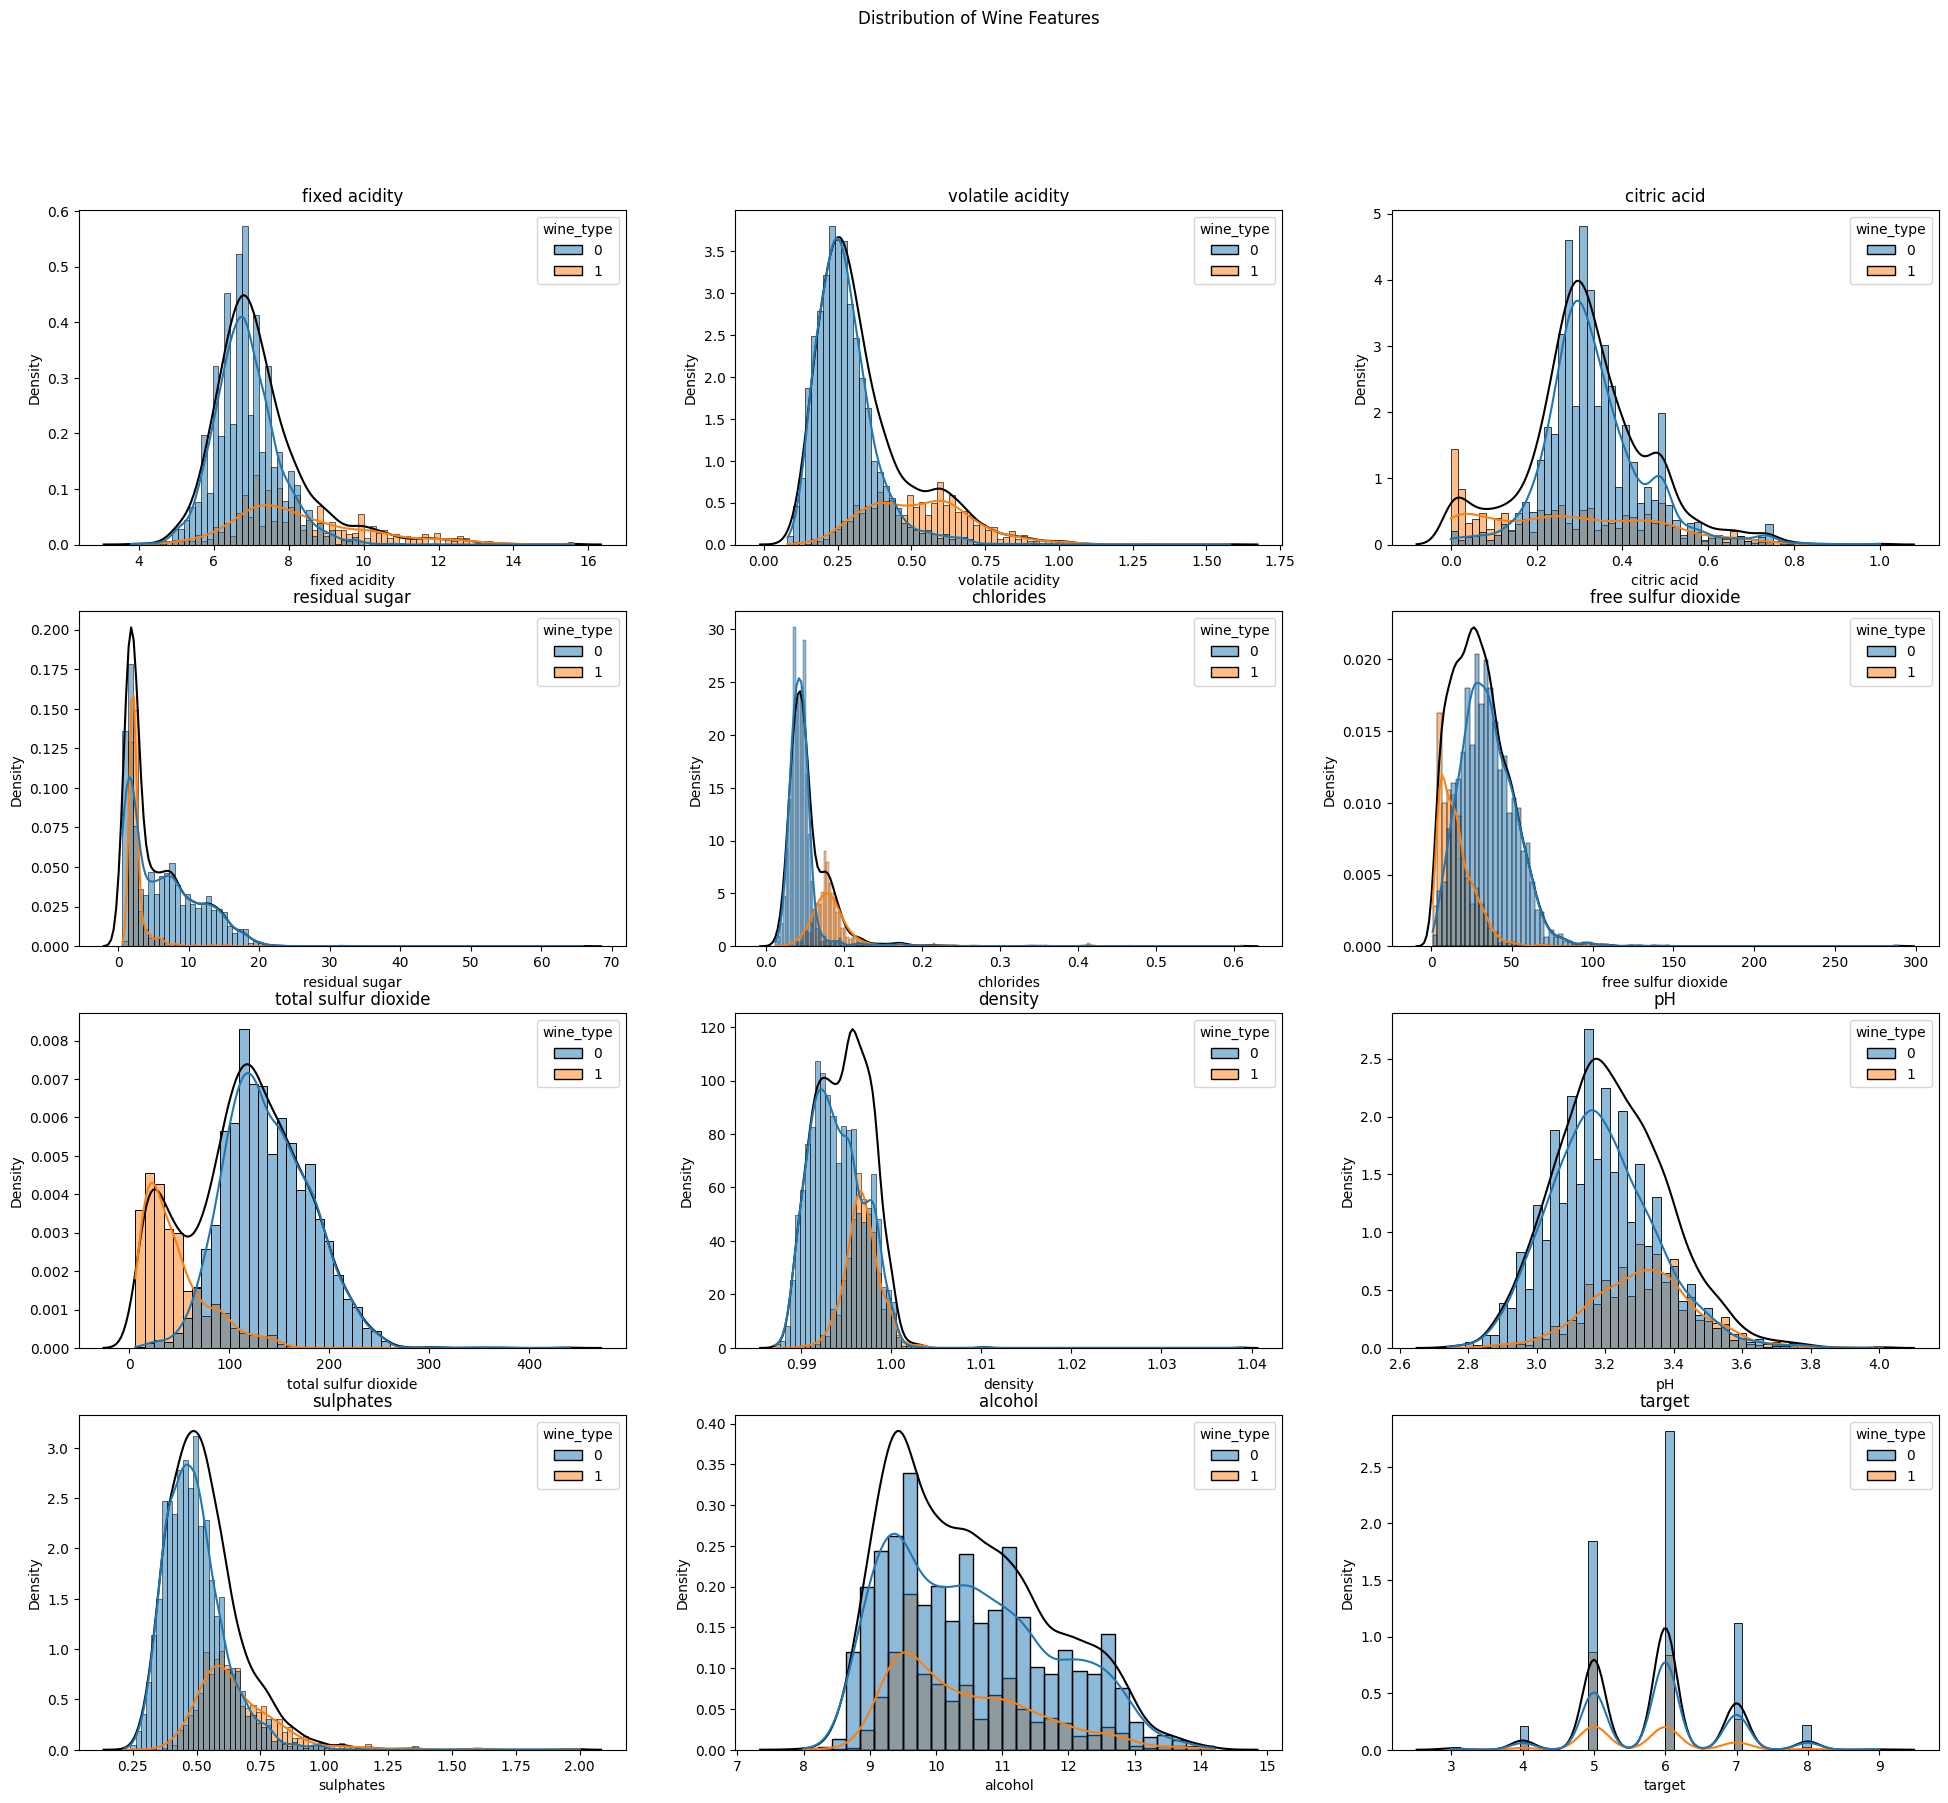

In [14]:
# observe the distribution of all the variables using sns
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
fig.suptitle('Distribution of Wine Features')

for i, ax in enumerate(axes.flatten()):
    if i == 11: i+=1 # skip the plot of wine type and use target instead
    sns.kdeplot(data=data, x=data.columns[i], ax=ax, color='black')
    sns.histplot(data=data, x=data.columns[i], ax=ax, kde=True, hue='wine_type', stat='density')
    ax.set_title(data.columns[i])
    
plt.show()


# Define Classification Models
Define the classification models to be used for comparaison.

In [15]:
# Import the necessary regression models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


all_models = []
all_models_names = []
all_params = []


# Define the regression models and their hyperparameters

#1
model = LogisticRegression()
params = {}
all_models.append(model)
all_models_names.append('LogisticRegression')
all_params.append(params)


#2
model = RandomForestClassifier(random_state=rd_state)
params = {
    'n_estimators': [100, 500, 1000], 
    # 'max_depth': [None, 5, 10, 20],
}
all_models.append(model)
all_models_names.append('RandomForest')
all_params.append(params)


#3
model = ExtraTreesClassifier(random_state=rd_state)
params = {
    'n_estimators': [100, 500, 1000], 
    # 'max_depth': [None, 5, 10, 20],
}
all_models.append(model)
all_models_names.append('ExtraTrees')
all_params.append(params)

#4
model = SVC(degree=5)
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10], 
}
all_models.append(model)
all_models_names.append('SVM')
all_params.append(params)

#5
model = KNeighborsClassifier()
params = {
    # 'n_neighbors': [3, 5, 7, 9, 11], 
    'n_neighbors': np.round(np.linspace(2, 20, 5), 0).astype(int), 
    'weights': ['uniform', 'distance']
}
all_models.append(model)
all_models_names.append('KNeighbors')
all_params.append(params)


#6
model = MLPClassifier(max_iter=500, random_state=rd_state)
params = {
    'hidden_layer_sizes': [(8, 16), (8, 16, 32), (16, 32, 16)], 
    # 'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.01, 0.1, 1],
}
all_models.append(model)
all_models_names.append('MLP')
all_params.append(params)

##



def create_lists_for_subset(models_names):
    models = []
    params = []
    for i, name in enumerate(all_models_names) :
        if name in models_names:
            models.append(all_models[i])
            params.append(all_params[i])        


    return models, params

# models_names = ['RandomForest', 'ExtraTrees']#, 'KNeighbors']
models_names = all_models_names

models, params = create_lists_for_subset(models_names)

# Hyperparameter Tuning with GridSearchCV
Use GridSearchCV to tune the hyperparameters of each model and find the best performing set of parameters.

In [16]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create empty lists to store the best parameters and best scores for each model
dfs = []
best_params = []
best_scores = []

# Loop through each model and its corresponding hyperparameters
for model, param in zip(models, params):
    print(model.__class__.__name__)
    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(clone(model), param, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    

    # Get the best parameters and best score
    dfs.append(pd.DataFrame(grid_search.cv_results_))
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

# Create a dataframe to store the best parameters and best scores for each model
df_grid_search_score = pd.DataFrame({'Model': models_names, 'Best Parameters': best_params, 'best_CVscore': best_scores})

# Display the best parameters and best scores for each model
df_grid_search_score

LogisticRegression


c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of IT

RandomForestClassifier
ExtraTreesClassifier


c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


SVC


c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


KNeighborsClassifier


c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


MLPClassifier


c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) re

,Model,Best Parameters,best_CVscore
0,LogisticRegression,{},0.178
1,RandomForest,{'n_estimators': 500},0.381
2,ExtraTrees,{'n_estimators': 500},0.365
3,SVM,"{'C': 1, 'kernel': 'rbf'}",0.241
4,KNeighbors,"{'n_neighbors': 20, 'weights': 'distance'}",0.325
5,MLP,"{'alpha': 1, 'hidden_layer_sizes': (16, 32, 16)}",0.253


In [17]:
# # specific model for each wine type

# # Create empty lists to store the best parameters and best scores for each model
# best_params0 = []
# best_scores0 = []

# best_params1 = []
# best_scores1 = []


# # Loop through each model and its corresponding hyperparameters
# for model, param in zip(models, params):
#     # Use GridSearchCV to find the best hyperparameters
#     grid_search0 = GridSearchCV(clone(model), param, cv=5, scoring='r2')
#     grid_search0.fit(X0_train, y0_train)
    
#     # Get the best parameters and best score
#     best_params0.append(grid_search0.best_params_)
#     best_scores0.append(grid_search0.best_score_)

#     grid_search1 = GridSearchCV(clone(model), param, cv=5, scoring='r2')
#     grid_search1.fit(X1_train, y1_train)
    
#     # Get the best parameters and best score
#     best_params1.append(grid_search1.best_params_)
#     best_scores1.append(grid_search1.best_score_)


# # Create a dataframe to store the best parameters and best scores for each model
# df_grid_search_score0 = pd.DataFrame({'Model': models_names, 'Best Parameters': best_params0, 'best_CVscore': best_scores0})
# df_grid_search_score1 = pd.DataFrame({'Model': models_names, 'Best Parameters': best_params1, 'best_CVscore': best_scores1})

# df_grid_search_score0


In [18]:
# df_grid_search_score1

# Train and evaluate each best models 

In [19]:
# checking the model performance on the test set (using the best hyperparameters)

# Create empty lists to store the R-squared scores for each model
train_scores = []
test_scores = []

# Loop through each model and its corresponding best parameters
for model, param in zip(models, best_params):
    # Fit the model on the training data using the best parameters
    model.set_params(**param)
    model.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the performance using the R-squared score
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    # Append the R-squared scores to the corresponding lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a dataframe to store the R-squared scores for each model
df_test_score = pd.DataFrame({'Model': models_names, 'Train Score': train_scores, 'test_score': test_scores})

# Display the R-squared scores for each model
df_grid_search_score['test_score'] = df_test_score['test_score']
df_test_score


c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Score,test_score
0,LogisticRegression,0.194,0.190
1,RandomForest,1.000,0.378
2,ExtraTrees,1.000,0.355
3,SVM,0.311,0.238
4,KNeighbors,1.000,0.265
5,MLP,0.317,0.244


In [20]:
df_grid_search_score.drop(columns=['Best Parameters'])


,Model,best_CVscore,test_score
0,LogisticRegression,0.178,0.190
1,RandomForest,0.381,0.378
2,ExtraTrees,0.365,0.355
3,SVM,0.241,0.238
4,KNeighbors,0.325,0.265
5,MLP,0.253,0.244


In [19]:
# # checking the model performance on the test set (models depend on the wine type)

# # Create empty lists to store the R-squared scores for each model
# train_scores = []
# test_scores = []

# y_train_concat = np.concatenate((y0_train, y1_train))
# y_test_concat = np.concatenate((y0_test, y1_test))

# # Loop through each model and its corresponding best parameters
# for model, param0, param1 in zip(models, best_params0, best_params1):
#     # Fit the model on the training data using the best parameters for wine type 0
#     model0 = clone(model)
#     model0.set_params(**param0)
#     model0.fit(X0_train, y0_train)
    
#     # Predict on the training and test data
#     y_train_pred0 = model0.predict(X0_train)
#     y_test_pred0 = model0.predict(X0_test)
    
#     # Fit the model on the training data using the best parameters for wine type 1
#     model1 = clone(model)
#     model1.set_params(**param1)
#     model1.fit(X1_train, y1_train)
    
#     # Predict on the training and test data
#     y_train_pred1 = model1.predict(X1_train)
#     y_test_pred1 = model1.predict(X1_test)

#     # Concatenate the predictions on the training and test data
#     y_train_pred = np.concatenate((y_train_pred0, y_train_pred1))
#     y_test_pred = np.concatenate((y_test_pred0, y_test_pred1))

#     # Evaluate the performance using the R-squared score
#     train_score = r2_score(y_train_concat, y_train_pred)
#     test_score = r2_score(y_test_concat, y_test_pred)
    
#     # Append the R-squared scores to the corresponding lists
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     # break

# # Create a dataframe to store the R-squared scores for each model
# df_test_score_bytype = pd.DataFrame({'Model': models_names, 'Train Score': train_scores, 'test_score': test_scores})

# # Display the R-squared scores for each model
# df_test_score_bytype


,Model,Train Score,Test Score
0,Extra Trees,0.825,0.39


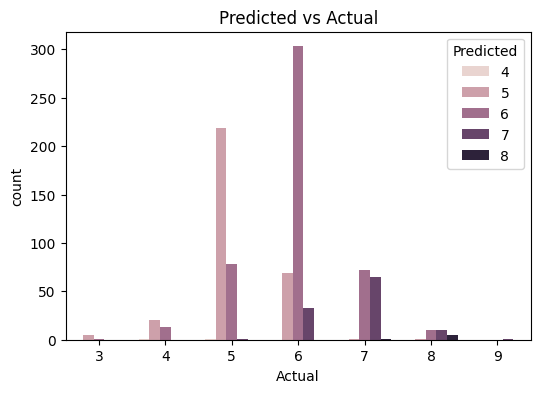

In [33]:
# # visualize the results of the best model classification (np.round(y_test_pred, 0))
# # and compare it with the actual classification (y_test)

# # Create a dataframe to store the predictions and actual values
# y_test_pred = np.round(y_test_pred, 0)
# y_test_pred = y_test_pred.astype(int)
# y_test_pred = pd.Series(y_test_pred, name='Predicted')
# y_test = y_test.reset_index(drop=True)
# y_test = pd.Series(y_test, name='Actual')
# results = pd.concat([y_test_pred, y_test], axis=1)

# # Create a countplot to show the number of correct and incorrect predictions
# plt.figure(figsize=(6, 4))
# sns.countplot(x='Actual', hue='Predicted', data=results)
# plt.title('Predicted vs Actual')
# plt.show()

# train the best model on the whole training set and make predictions on the test set

using best model for the grid scores ?
or the test on the test dataset left out from the real training dataset ?

In [17]:
# for the best model for the grid search score
i_model = df_grid_search_score['best_CVscore'].idxmax()

# for the best model on the "fake" test dataset
i_model = df_test_score['test_score'].idxmax()

model = clone(models[i_model])
name_model = df_grid_search_score['Model'][i_model].replace(' ', '').replace('_', '')
param_model = df_grid_search_score['Best Parameters'][i_model]


# load the test dataset and make prediction using the best model 
test_data = pd.read_csv('data/wine_test.csv')
train_data = pd.read_csv('data/wine_train.csv')

X_submit_train, y_submit_train = train_data.drop(columns=['wine_ID', 'target']), train_data['target']

X_submit, wine_ids = test_data.drop(columns=['wine_ID']), test_data['wine_ID']

scaler = StandardScaler()
X_submit_train, X_submit = scaler.fit_transform(X_submit_train), scaler.transform(X_submit)


# Predict on the test data using random forest
model.fit(X_submit_train, y_submit_train)
y_submit = model.predict(X_submit)




In [18]:
# Save predictions to file
param_model_str = ''
for key, value in param_model.items():
    param_model_str += key + '_' + str(value) + '_'
param_model_str = param_model_str[:-1]


filename = f'submits/wine_submit_class_{name_model}_{param_model_str}.csv'

pd.DataFrame({'wine_ID':wine_ids, 'target':y_submit}).to_csv(filename, index=False)

In [34]:
model0 = RandomForestRegressor(random_state=rd_state, **grid_search_score0['Best Parameters'][1])
model1 = RandomForestRegressor(random_state=rd_state, **grid_search_score1['Best Parameters'][1])


# load the test dataset and make prediction using the best model 
test_data = pd.read_csv('data/wine_test.csv')
train_data = pd.read_csv('data/wine_train.csv')


X_submit_train, y_submit_train = train_data.drop(columns=['wine_ID', 'target']), train_data['target']

X0_submit_train = X_submit_train[X_submit_train['wine_type'] == 0].drop(columns=['wine_type'])
X1_submit_train = X_submit_train[X_submit_train['wine_type'] == 1].drop(columns=['wine_type'])

y0_submit_train = y_submit_train[X_submit_train['wine_type'] == 0]
y1_submit_train = y_submit_train[X_submit_train['wine_type'] == 1]


X_submit, wine_ids = test_data.drop(columns=['wine_ID']), test_data['wine_ID']

X0_submit = X_submit[X_submit['wine_type'] == 0].drop(columns=['wine_type'])
wine_ids0 = wine_ids[X_submit['wine_type'] == 0]

X1_submit = X_submit[X_submit['wine_type'] == 1].drop(columns=['wine_type'])
wine_ids1 = wine_ids[X_submit['wine_type'] == 1]

scaler0, scaler1 = StandardScaler(), StandardScaler()
X0_submit_train, X0_submit = scaler0.fit_transform(X0_submit_train), scaler0.transform(X0_submit)
X1_submit_train, X1_submit = scaler1.fit_transform(X1_submit_train), scaler1.transform(X1_submit)


# Predict on the test data using random forest
model0.fit(X0_submit_train, y0_submit_train)
y0_submit = model0.predict(X0_submit)

model1.fit(X1_submit_train, y1_submit_train)
y1_submit = model1.predict(X1_submit)

y_submit = np.concatenate((y0_submit, y1_submit))
wine_ids = np.concatenate((wine_ids0, wine_ids1))

pd.DataFrame({'wine_ID':wine_ids, 'target':y_submit}).to_csv('submits/wine_submit_diff_type.csv', index=False)